<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-projects/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [123]:
train_data = pd.read_csv('train.csv')
X_train = train_data.copy()
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
test_data = pd.read_csv('test.csv')
X_test = test_data.copy()
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
tmp = pd.DataFrame({'Survived':['no','yes']})
tmp['Count'] = X_train['Survived'].value_counts()
tmp

,Survived,Count
0,no,549
1,yes,342


In [126]:
px.bar(tmp, x='Survived', y='Count', width=800, height=500)

In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Sex

In [129]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

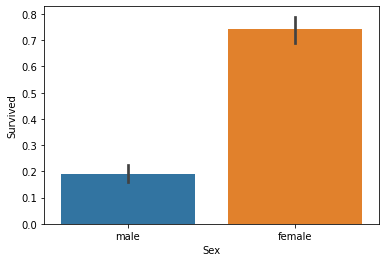

In [130]:
sns.barplot(data=X_train, x='Sex', y='Survived')

In [131]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [132]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Cabin

In [133]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
#Drop Cabin - too many NaNs
X_train = X_train.drop('Cabin', axis=1)
X_test = X_test.drop('Cabin', axis=1)

Ticket, PassengerId

In [135]:
X_train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
323951      1
7598        1
350029      1
343276      1
3101298     1
Name: Ticket, Length: 681, dtype: int64

In [136]:
#Drop for PassengerId, Ticket - variables with unique values
X_train = X_train.drop(['PassengerId', 'Ticket'], axis=1)
X_test = X_test.drop(['PassengerId', 'Ticket'], axis=1)

Embarked

In [137]:
X_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [138]:
# Filling Embarked with most frequent
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer.fit(X_train[['Embarked']])
X_train[['Embarked']] = imputer.transform(X_train[['Embarked']])
imputer.statistics_

array(['S'], dtype=object)

In [139]:
X_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [140]:
X_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [141]:
X_train['Embarked'] = X_train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
X_train['Embarked'] = X_train['Embarked'].astype(int)
X_train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [142]:
X_test['Embarked'] = X_test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
X_test['Embarked'] = X_test['Embarked'].astype(int)
X_test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

Pclass

In [143]:
X_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

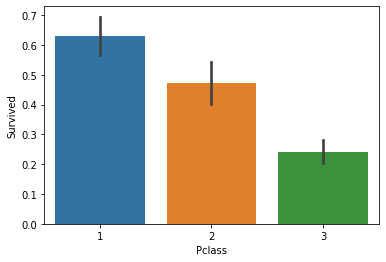

In [144]:
sns.barplot(data=X_train, x='Pclass', y='Survived')

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


SibSp

In [146]:
X_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [147]:
px.histogram(X_train, x='SibSp', width=800, height=500)

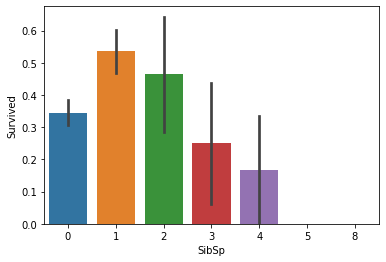

In [148]:
sns.barplot(data=X_train, x='SibSp', y='Survived')

Parch

In [149]:
X_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [150]:
px.histogram(X_train, x='Parch', width=800, height=500)

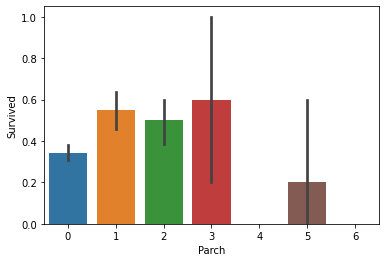

In [151]:
sns.barplot(data=X_train, x='Parch', y='Survived') 

Family = Parch + SibSp

In [152]:
X_train['Family'] = X_train['Parch'] + X_train['SibSp']
X_test['Family'] = X_test['Parch'] + X_test['SibSp']

X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0


In [153]:
#Drop for Parch, SibSp
X_train = X_train.drop(['Parch', 'SibSp'], axis=1)
X_test = X_test.drop(['Parch', 'SibSp'], axis=1)

In [154]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


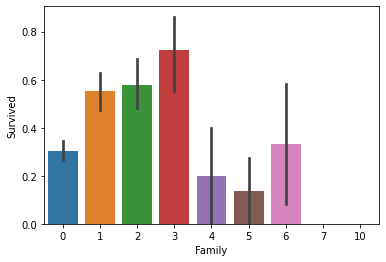

In [155]:
sns.barplot(data=X_train, x='Family', y='Survived')

Name

In [156]:
name = X_train['Name'].apply(lambda x: x.split(','))

list = []
for i in range(0, X_train.shape[0]):
    list.append(name[i][1].split('.')[0])

In [157]:
X_train['Name'] = list

In [158]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,Mr,male,22.0,7.2500,0,1
1,1,1,Mrs,female,38.0,71.2833,1,1
2,1,3,Miss,female,26.0,7.9250,0,0
3,1,1,Mrs,female,35.0,53.1000,0,1
4,0,3,Mr,male,35.0,8.0500,0,0


In [159]:
X_train['Name'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Mme               1
 Sir               1
 the Countess      1
 Ms                1
 Don               1
 Lady              1
 Jonkheer          1
 Capt              1
Name: Name, dtype: int64

In [160]:
rare = ['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Mme', 'Lady', 'Ms', 'Don', 'Sir', 'Jonkheer', 'Capt', 'the Countess']

for i in rare:
    X_train['Name'] = X_train['Name'].str.replace(i,'Rare')
X_train['Name'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
 Rare       27
Name: Name, dtype: int64

In [161]:
name = X_test['Name'].apply(lambda x: x.split(','))

list = []
for i in range(0, X_test.shape[0]):
    list.append(name[i][1].split('.')[0])

In [162]:
X_test['Name'] = list

In [163]:
X_test['Name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Ms          1
 Dona        1
 Dr          1
Name: Name, dtype: int64

In [164]:
rare = ['Col', 'Rev', 'Ms', 'Dona', 'Dr']

for i in rare:
    X_test['Name'] = X_test['Name'].str.replace(i,'Rare')
X_test['Name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rare        7
Name: Name, dtype: int64

In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [166]:
X_train['Name'] = X_train['Name'].str.replace('Miss', '2')
X_train['Name'] = X_train['Name'].str.replace('Master', '4')
X_train['Name'] = X_train['Name'].str.replace('Mrs', '3')
X_train['Name'] = X_train['Name'].str.replace('Mr', '1')
X_train['Name'] = X_train['Name'].str.replace('Rare', '5')
X_train['Name']

0       1
1       3
2       2
3       3
4       1
       ..
886     5
887     2
888     2
889     1
890     1
Name: Name, Length: 891, dtype: object

In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [168]:
X_train['Name'] = X_train['Name'].astype(int)

In [169]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [170]:
X_test['Name'] = X_test['Name'].str.replace('Miss', '2')
X_test['Name'] = X_test['Name'].str.replace('Master', '4')
X_test['Name'] = X_test['Name'].str.replace('Mrs', '3')
X_test['Name'] = X_test['Name'].str.replace('Mr', '1')
X_test['Name'] = X_test['Name'].str.replace('Rare', '5')
X_test['Name']

0       1
1       3
2       1
3       1
4       3
       ..
413     1
414     5
415     1
416     1
417     4
Name: Name, Length: 418, dtype: object

In [171]:
X_test['Name'] = X_test['Name'].astype(int)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    int64  
 6   Family    418 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


Fare

In [172]:
X_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
Fare         1
Embarked     0
Family       0
dtype: int64

In [173]:
#Fare filling with mean

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X_train[['Fare']])
X_test[['Fare']] = imputer.transform(X_test[['Fare']])
imputer.statistics_

array([32.20420797])

In [174]:
X_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [175]:
px.histogram(X_train, x='Fare', nbins=20, opacity=0.7, width=950)

In [176]:
pd.qcut(X_train['Fare'], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [177]:
X_train['Fare'] = pd.qcut(X_train['Fare'], 5, labels=[1, 2, 3, 4, 5])
X_train['Fare'].value_counts()

2    184
4    180
1    179
5    176
3    172
Name: Fare, dtype: int64

In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    int64   
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   Fare      891 non-null    category
 6   Embarked  891 non-null    int64   
 7   Family    891 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(1)
memory usage: 49.9+ KB


In [179]:
X_train['Fare'] = X_train['Fare'].astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Family    891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [180]:
X_test.loc[X_test['Fare'] < 7.854, 'Fare'] = 1
X_test.loc[(X_test['Fare'] > 7.854) & (X_test['Fare'] < 10.5), 'Fare'] = 2
X_test.loc[(X_test['Fare'] > 10.5) & (X_test['Fare'] < 21.679), 'Fare'] = 3
X_test.loc[(X_test['Fare'] > 21.679) & (X_test['Fare'] < 39.688), 'Fare'] = 4
X_test.loc[X_test['Fare'] > 39.688, 'Fare'] = 5

X_test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,3,1,male,34.5,1.0,2,0
1,3,3,female,47.0,1.0,0,1
2,2,1,male,62.0,2.0,2,0
3,3,1,male,27.0,2.0,0,0
4,3,3,female,22.0,3.0,0,2


In [181]:
X_test['Fare'] = X_test['Fare'].astype(int)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   Fare      418 non-null    int64  
 5   Embarked  418 non-null    int64  
 6   Family    418 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 23.0+ KB


In [182]:
X_test['Fare'].value_counts()

5     88
1     88
3     84
4     80
2     67
10    11
Name: Fare, dtype: int64

In [183]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,1,male,22.0,1,0,1
1,1,1,3,female,38.0,5,1,1
2,1,3,2,female,26.0,2,0,0
3,1,1,3,female,35.0,5,0,1
4,0,3,1,male,35.0,2,0,0


Age

In [184]:
X_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [185]:
trace1 = px.histogram(X_train, x='Age', nbins=20, opacity=0.7, width=950)
trace1

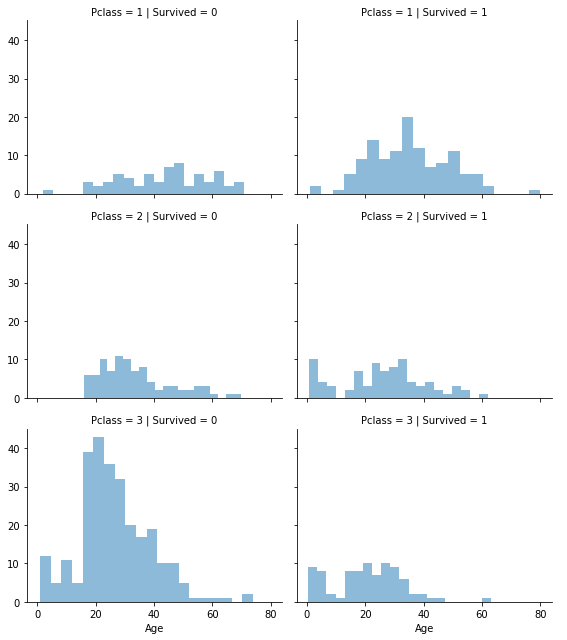

In [186]:
#Age vs. Pclass

grid = sns.FacetGrid(X_train, row='Pclass',col='Survived', height=3, aspect=1.3)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

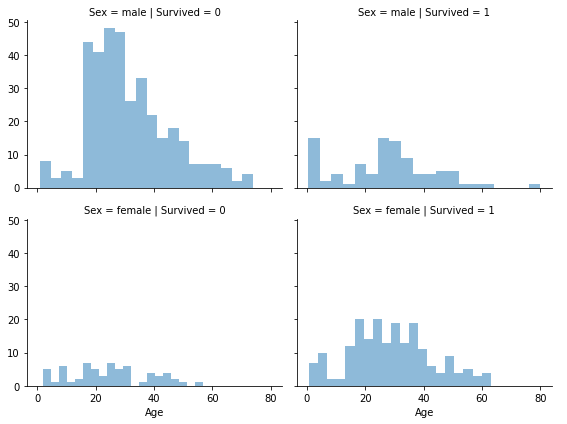

In [187]:
# Age vs Sex

grid = sns.FacetGrid(X_train, col='Survived', row='Sex', height=3, aspect=1.3)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [188]:
median = X_train.groupby(['Pclass', 'Sex'])['Age'].median()
median

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [189]:
X_train.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.isnull().sum())

Pclass  Sex   
1       female     9
        male      21
2       female     2
        male       9
3       female    42
        male      94
Name: Age, dtype: int64

In [190]:
def train_age_na(pclass, sex, na):
    X_train.loc[(X_train['Pclass'] == pclass) & (X_train['Sex'] == sex), 'Age'] = X_train.loc[(X_train['Pclass'] == pclass) & (X_train['Sex'] == sex), 'Age'].fillna(na)

In [191]:
na_list = np.array([[35, 40], [28, 30], [21.5, 25]])
sex = ['female', 'male']
pclass = [1, 2, 3]

for idx_p, p in enumerate(pclass):
    for idx_s, s in enumerate(sex):
        train_age_na(p, s, na_list[idx_p, idx_s])

In [192]:
def test_age_na(pclass, sex, na):
    X_test.loc[(X_test['Pclass'] == pclass) & (X_test['Sex'] == sex), 'Age'] = X_test.loc[(X_test['Pclass'] == pclass) & (X_test['Sex'] == sex), 'Age'].fillna(na)

for idx_p, p in enumerate(pclass):
    for idx_s, s in enumerate(sex):
        test_age_na(p, s, na_list[idx_p, idx_s])

In [193]:
X_train['Age'].isnull().sum()

0

In [194]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.03, shared_yaxes=True)

trace1 = trace1['data'][0]
trace2 =px.histogram(X_train, x='Age', nbins=20, opacity=0.7, width=950)['data'][0]

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.show()

In [195]:
pd.cut(X_train['Age'], 5).value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [196]:
X_train['Age'] = pd.cut(X_train['Age'], 5, labels=[1, 2, 3, 4, 5])
X_train['Age'].value_counts()

2    493
3    218
1    100
4     69
5     11
Name: Age, dtype: int64

In [197]:
X_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,1,0.550000
1,2,0.336714
2,3,0.412844
3,4,0.434783
4,5,0.090909


In [198]:
X_train['Age'] = X_train['Age'].astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    int64 
 3   Sex       891 non-null    object
 4   Age       891 non-null    int64 
 5   Fare      891 non-null    int64 
 6   Embarked  891 non-null    int64 
 7   Family    891 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 55.8+ KB


In [199]:
X_test.loc[X_test['Age'] < 16.336, 'Age'] = 1
X_test.loc[(X_test['Age'] > 16.336) & (X_test['Age'] < 32.252), 'Age'] = 2
X_test.loc[(X_test['Age'] > 32.252) & (X_test['Age'] < 48.168), 'Age'] = 3
X_test.loc[(X_test['Age'] > 48.168) & (X_test['Age'] < 64.084), 'Age'] = 4
X_test.loc[X_test['Age'] > 64.084, 'Age'] = 5

In [200]:
X_test['Age'] = X_test['Age'].astype(int)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    int64 
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   Fare      418 non-null    int64 
 5   Embarked  418 non-null    int64 
 6   Family    418 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 23.0+ KB


In [201]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,1,male,2,1,0,1
1,1,1,3,female,3,5,1,1
2,1,3,2,female,2,2,0,0
3,1,1,3,female,3,5,0,1
4,0,3,1,male,3,2,0,0


Age x Class

In [202]:
X_train['Age*Class'] = X_train['Age'] * X_train['Pclass']
X_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Age*Class
0,0,3,1,male,2,1,0,1,6
1,1,1,3,female,3,5,1,1,3
2,1,3,2,female,2,2,0,0,6
3,1,1,3,female,3,5,0,1,3
4,0,3,1,male,3,2,0,0,9


In [203]:
X_test['Age*Class'] = X_test['Age'] * X_test['Pclass']

One hot encoder for categorical features

In [204]:
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_train.head()

,Survived,Pclass,Name,Age,Fare,Embarked,Family,Age*Class,Sex_male
0,0,3,1,2,1,0,1,6,1
1,1,1,3,3,5,1,1,3,0
2,1,3,2,2,2,0,0,6,0
3,1,1,3,3,5,0,1,3,0
4,0,3,1,3,2,0,0,9,1


In [205]:
X_test = pd.get_dummies(data=X_test, drop_first=True)
X_test.head()

,Pclass,Name,Age,Fare,Embarked,Family,Age*Class,Sex_male
0,3,1,3,1,2,0,9,1
1,3,3,3,1,0,1,9,0
2,2,1,4,2,2,0,8,1
3,3,1,2,2,0,0,6,1
4,3,3,2,3,0,2,6,0


In [206]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Name       891 non-null    int64
 3   Age        891 non-null    int64
 4   Fare       891 non-null    int64
 5   Embarked   891 non-null    int64
 6   Family     891 non-null    int64
 7   Age*Class  891 non-null    int64
 8   Sex_male   891 non-null    uint8
dtypes: int64(8), uint8(1)
memory usage: 56.7 KB


In [207]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pclass     418 non-null    int64
 1   Name       418 non-null    int64
 2   Age        418 non-null    int64
 3   Fare       418 non-null    int64
 4   Embarked   418 non-null    int64
 5   Family     418 non-null    int64
 6   Age*Class  418 non-null    int64
 7   Sex_male   418 non-null    uint8
dtypes: int64(7), uint8(1)
memory usage: 23.4 KB


Correlations

In [208]:
corr = X_train.corr()
corr

,Survived,Pclass,Name,Age,Fare,Embarked,Family,Age*Class,Sex_male
Survived,1.000000,-0.338481,0.414088,-0.036384,0.317783,0.106811,0.016639,-0.351685,-0.543351
Pclass,-0.338481,1.000000,-0.184841,-0.419593,-0.705206,0.045702,0.065997,0.627019,0.131900
Name,0.414088,-0.184841,1.000000,-0.053459,0.331468,0.051211,0.328287,-0.252443,-0.508099
Age,-0.036384,-0.419593,-0.053459,1.000000,0.173361,-0.050496,-0.232052,0.387555,0.074045
Fare,0.317783,-0.705206,0.331468,0.173361,1.000000,-0.089125,0.418125,-0.564872,-0.244943
Embarked,0.106811,0.045702,0.051211,-0.050496,-0.089125,1.000000,-0.080281,-0.024056,-0.116569
Family,0.016639,0.065997,0.328287,-0.232052,0.418125,-0.080281,1.000000,-0.158938,-0.200988
Age*Class,-0.351685,0.627019,-0.252443,0.387555,-0.564872,-0.024056,-0.158938,1.000000,0.184177
Sex_male,-0.543351,0.131900,-0.508099,0.074045,-0.244943,-0.116569,-0.200988,0.184177,1.000000


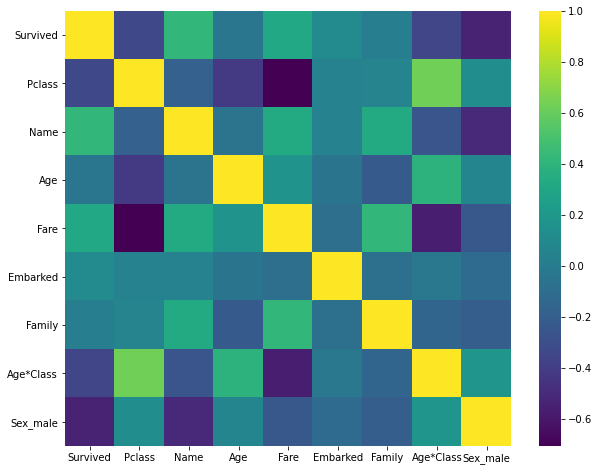

In [209]:
plt.figure(figsize=(10, 8)),
sns.heatmap(corr, cmap='viridis')

Target

In [210]:
y_train = X_train.pop('Survived')
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Feature Scaling

In [211]:
from sklearn.preprocessing import MinMaxScaler

columns = X_train.columns

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Modeling part

In [212]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg =  LogisticRegression()
log_reg.fit(X_train, y_train)

score = log_reg.score(X_train, y_train)
print(score)

0.8103254769921436


In [213]:
#SVM

from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='poly') 
svc.fit(X_train, y_train)

score = svc.score(X_train, y_train)
print(score)

0.8361391694725028


In [214]:
#KNeighbors

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train, y_train)

score = knc.score(X_train, y_train)
print(score)

0.8417508417508418


In [215]:
# GridSearchCV for Random Forest 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)


params = {'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1, 10),
          'min_samples_leaf': np.arange(1, 5),
          'min_samples_split': np.arange(2, 5)}

grid_search = GridSearchCV(random_forest, params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_ 


In [216]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = 'gini', 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 3,
                                       max_depth = 5)
random_forest.fit(X_train, y_train)

score = random_forest.score(X_train, y_train)
print(score)

predictions = random_forest.predict(X_test)

0.8451178451178452


In [217]:
random_forest.feature_importances_

array([0.10511415, 0.28716185, 0.02840225, 0.08751284, 0.0199359 ,
       0.09243764, 0.09806857, 0.2813668 ])

In [218]:
features = pd.DataFrame(data={'feature': columns, 'feature_importance': random_forest.feature_importances_})
features.sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
1,Name,0.287162
7,Sex_male,0.281367
0,Pclass,0.105114
6,Age*Class,0.098069
5,Family,0.092438
3,Fare,0.087513
2,Age,0.028402
4,Embarked,0.019936


Metrics

In [219]:
y_pred = random_forest.predict(X_train)

In [236]:
#Accuracy score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy score: {round(accuracy, 3)}')

Accuracy score: 0.845


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66c4923278>)

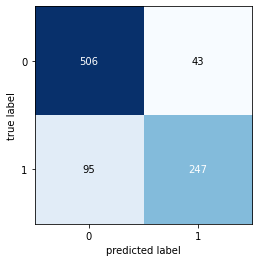

In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)


In [227]:
tn, fp, fn, tp = cm.ravel()

print(f'TN - true negative: {tn}')
print(f'FN - false nagative: {fn}')
print(f'fN - false positive: {fn}')
print(f'TP - true positive: {tp}')


TN - true negative: 506
FN - false nagative: 95
fN - false positive: 95
TP - true positive: 247


In [230]:
# False Positive Rate

FPR = fp / (fp + tn)
print(f'False positive rate: {round(FPR,3)}')

False positive rate: 0.078


In [231]:
# False Negative Rate

FNR = fn / (fn + tp)
print(f'False negative rate: {round(FNR, 3)}')

False negative rate: 0.278


In [232]:
# Precision

precision = tp / (tp + fp)
print(f'Precision: {round(precision, 3)}')

Precision: 0.852


In [233]:
# Recall

recall = tp / (tp + fn)
print(f'Recall: {round(recall, 3)}')

Recall: 0.722


In [234]:
# F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred)
print(f'F1 Score: {round(f1, 3)}')

F1 Score: 0.782


In [237]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.85      0.72      0.78       342

    accuracy                           0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



In [242]:
#ROC Curve

import plotly.graph_objects as go
from sklearn.metrics import roc_curve
fpr, tpr, tresh = roc_curve(y_train, y_pred, pos_label=1)

fig = go.Figure(
    data=[
        go.Scatter(x=roc['fpr'], y=roc['tpr'],
                line_color='red',
                name='ROC Curve'),
        go.Scatter(x=[0, 1], y=[0, 1],
                mode='lines', 
                line_dash='dash', 
                line_color='navy')
    ],
    layout=go.Layout(xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      title='ROC Curve',
                      showlegend=False,
                      width=700))
fig.show()


Import to CSV

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")